In [62]:
# Imported Libraries
import numpy as np
import pandas as pd 
import copy
from collections import Counter
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer 
from imblearn.pipeline import Pipeline

#Sampling Libraries
from imblearn.over_sampling import SMOTE

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Visual Libraries
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Performance metrics libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc

import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)

1. Data Importing

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().values.any()

False

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
#Number of fraud and non fraud data
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

fraud_perc = len(fraud)/df.shape[0]
nonFraud_perc = len(nonFraud)/df.shape[0]

print("Total number of transactions is", df.shape[0],"of which", len(fraud),"are fraudulent and", len(nonFraud), "are not.")
print('Percentage of frauds :',fraud_perc*100,'%')
print('Percentage of non frauds :',nonFraud_perc*100,'%')

Total number of transactions is 284807 of which 492 are fraudulent and 284315 are not.
Percentage of frauds : 0.1727485630620034 %
Percentage of non frauds : 99.82725143693798 %


Text(0, 0.5, 'Frequency')

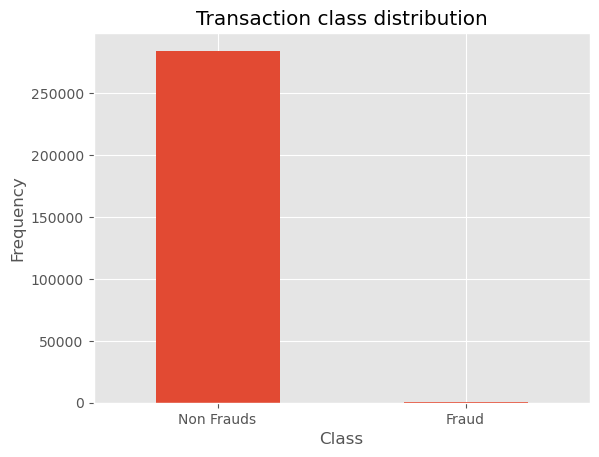

In [10]:
#Plot Transaction class against Frequency
labels = ['Non Frauds','Fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

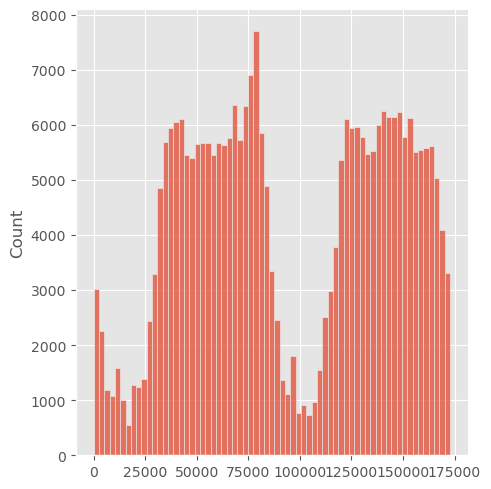

In [11]:
# distribution of Time
time = df['Time'].values
sns.displot(time)

<AxesSubplot:ylabel='Density'>

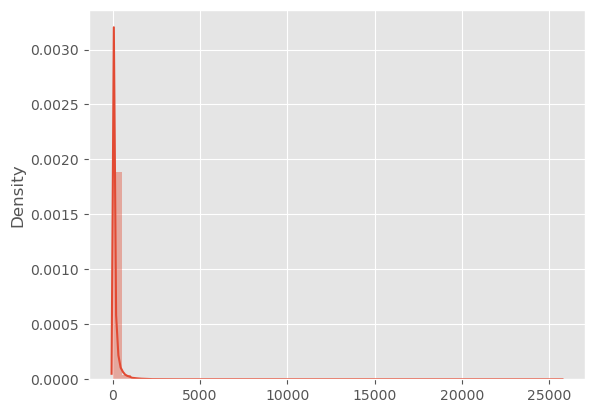

In [12]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

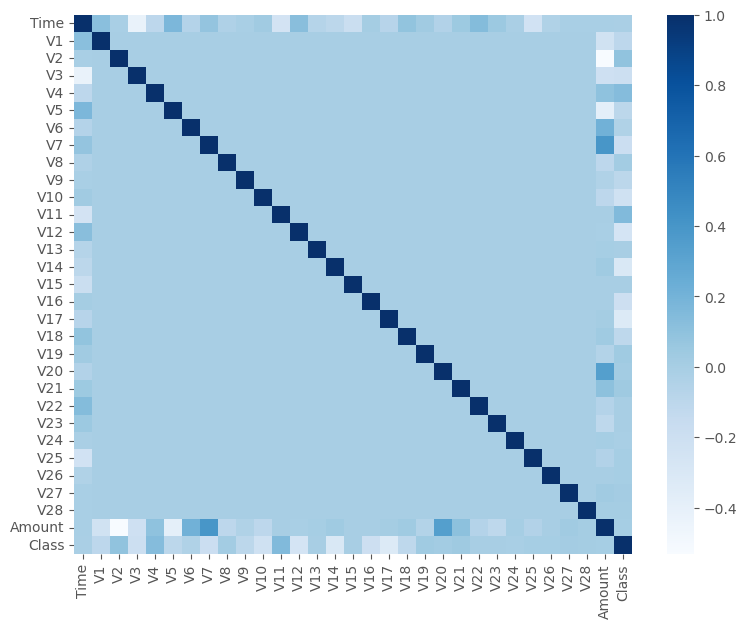

In [13]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, cmap='Blues')
plt.show()

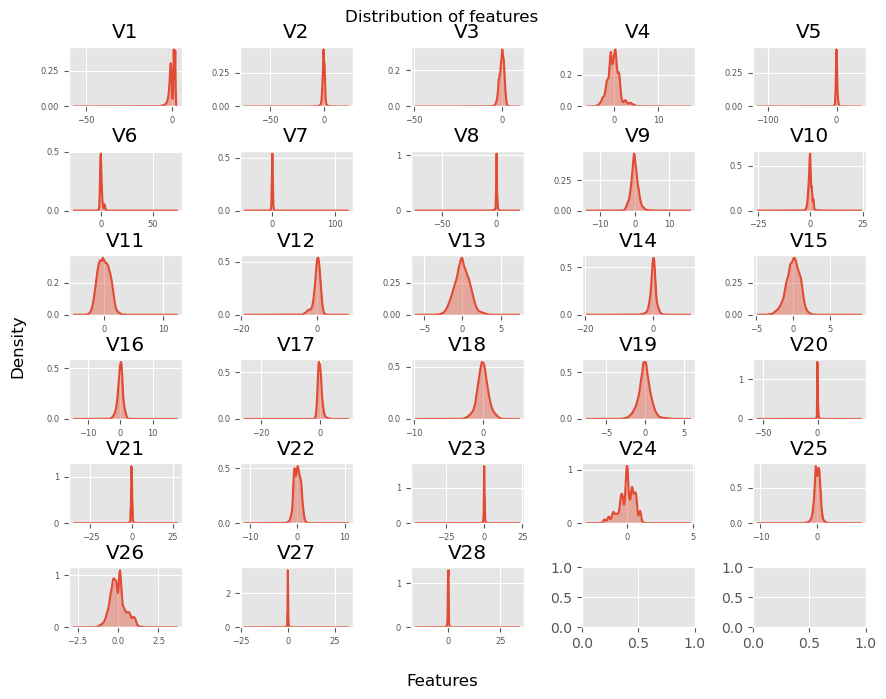

In [14]:
fig, axes = plt.subplots(6, 5, figsize=(9,7))
fig.suptitle('Distribution of features')
fig.supylabel('Density')
fig.supxlabel('Features')
fig.tight_layout()

for i, column in enumerate(df.columns[1:29], 1):
    plt.subplot(6,5,i)
    sns.distplot(df[column])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(column)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.show()

2. Train, Validate, Test split

In [39]:
X = df.drop(['Class'], axis=1)
y = df['Class']

#Split data initially to train and remaining 
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, stratify=y)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, stratify=y_rem)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the validation dataset is', X_valid.shape[0])
#print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The validation and test datasets have {sorted(Counter(y_valid).items())[0][1]} records for the majority class and {sorted(Counter(y_valid).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 227845
The number of records in the validation dataset is 56962
The training dataset has 227451 records for the majority class and 394 records for the minority class.
The validation and test datasets have 56864 records for the majority class and 98 records for the minority class.


In [40]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
121853,76345.0,-0.628998,-0.432101,1.810875,-2.646066,-0.363352,-0.098983,-0.415614,0.182497,-2.724561,...,-0.313334,-0.100544,-0.037981,-0.267169,-0.335225,0.335864,-0.252061,0.054330,0.047122,1.00
271925,164813.0,-2.777408,-3.837026,0.562736,-1.880141,0.743709,0.124016,-0.470755,-0.184995,-1.224141,...,-1.544450,-0.489937,0.713011,1.743520,-1.047666,0.247705,-0.030849,-0.164699,0.069101,128.00
273773,165690.0,1.988545,-0.211986,-1.667300,0.662469,0.047716,-1.309451,0.462881,-0.357082,0.586135,...,-0.268442,-0.014426,0.010903,0.057108,-0.002555,0.134094,0.383379,-0.098018,-0.070460,47.54
222809,143126.0,2.172468,-0.485278,-1.869370,-0.352243,0.154439,-0.777227,0.175424,-0.442111,-0.882668,...,-0.500025,-0.344420,-0.327968,0.119411,0.659279,0.179507,0.579297,-0.073384,-0.062685,28.00
57685,48015.0,-0.011090,0.257204,1.712531,1.857873,-0.684955,0.573743,-0.276495,-0.708196,0.228405,...,0.086938,0.779398,-0.006175,-0.270828,0.468564,0.899255,-0.085871,0.223994,0.237548,107.00


In [41]:
X_valid.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
58575,48450.0,-4.025144,-4.116440,0.085387,-1.260483,2.586030,-0.022885,1.399066,-1.004962,-0.456678,...,-2.603981,-1.283893,-0.039190,1.731711,-1.622011,0.719076,0.368088,0.286682,-0.971071,255.98
138528,82701.0,-0.475799,0.990264,1.670886,-0.097109,-0.110979,-0.695954,0.598929,0.070747,-0.661504,...,0.100749,-0.162669,-0.448867,-0.006767,0.515037,-0.252602,0.041261,0.261119,0.112951,2.99
176242,122684.0,2.157330,-0.853483,-1.895821,-0.943020,-0.151144,-0.742370,-0.210574,-0.166515,-0.613446,...,-0.093404,0.264560,0.692645,0.023711,0.720901,0.269934,-0.044045,-0.078091,-0.079568,33.74
136632,81801.0,-0.760915,0.288394,1.027128,0.286654,1.334988,-0.976344,1.209953,-0.309015,-0.602106,...,0.117064,-0.125579,-0.487231,0.291802,0.015235,-0.575180,-0.915015,-0.036222,-0.028633,60.40
17144,28476.0,-0.970306,0.425412,-0.875026,-1.463486,-0.016999,4.246302,-0.207612,1.684135,-0.235782,...,-0.084498,0.199847,0.174518,0.310069,1.064112,-0.506802,0.907352,-0.257968,-0.159513,285.00


## Data Pre-processing

### Scaling

In [42]:
X_train_processed = copy.deepcopy(X_train)
X_valid_processed = copy.deepcopy(X_valid)

standard_scaler = StandardScaler()
X_train_processed['Amount'] = standard_scaler.fit_transform(X_train_processed['Amount'].values.reshape(-1,1))
X_train_processed['Time'] = standard_scaler.fit_transform(X_train_processed['Time'].values.reshape(-1,1))
print("X_train_processed:")
display(X_train_processed.describe())

X_valid_processed['Amount'] = standard_scaler.transform(X_valid_processed['Amount'].values.reshape(-1,1))
X_valid_processed['Time'] = standard_scaler.transform(X_valid_processed['Time'].values.reshape(-1,1))
print("X_valid_processed:")
display(X_valid_processed.describe())

X_train_processed:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.278450e+05,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,2.278450e+05
mean,-9.951491e-17,-0.004006,-0.000334,0.002506,-0.000792,-0.000266,0.001597,-0.000265,0.001265,0.000151,...,0.000565,0.001074,0.000336,-0.000294,-0.000380,0.000250,0.000516,0.000944,0.000110,4.418575e-17
std,1.000002e+00,1.961247,1.659329,1.519083,1.415290,1.395155,1.337613,1.246646,1.188498,1.098953,...,0.775392,0.734092,0.725677,0.621643,0.605866,0.521185,0.481683,0.403689,0.331884,1.000002e+00
min,-1.994093e+00,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-37.060311,-73.216718,-11.126624,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.824849,-10.295397,-2.604551,-22.565679,-15.430084,-3.500467e-01
25%,-8.538583e-01,-0.920846,-0.598404,-0.886375,-0.849779,-0.693779,-0.766364,-0.554501,-0.207997,-0.643866,...,-0.211572,-0.228344,-0.542177,-0.162139,-0.355407,-0.317076,-0.326606,-0.070642,-0.052839,-3.274440e-01
50%,-2.133733e-01,0.011634,0.066399,0.182298,-0.021268,-0.055107,-0.271469,0.039765,0.022734,-0.051021,...,-0.062040,-0.028955,0.008367,-0.011314,0.040567,0.016350,-0.051634,0.001684,0.011397,-2.631132e-01
75%,9.377405e-01,1.314442,0.804472,1.029707,0.743160,0.612791,0.402353,0.571703,0.327578,0.597481,...,0.134114,0.186893,0.528870,0.147091,0.439257,0.350710,0.240670,0.092002,0.078817,-4.380378e-02
max,1.641965e+00,2.454930,19.167239,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.011691e+02


X_valid_processed:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,0.005364,0.016024,0.001334,-0.010025,0.003167,0.001062,-0.006388,0.001059,-0.005061,-0.000606,...,-0.002259,-0.004295,-0.001343,0.001178,0.001519,-0.000999,-0.002064,-0.003776,-0.000438,-1.992254
std,0.996442,1.948393,1.618843,1.504862,1.418187,1.318942,1.310677,1.198132,1.217489,1.097356,...,0.752793,0.736240,0.725805,0.635609,0.604775,0.521654,0.484396,0.403386,0.322782,0.005007
min,-1.994072,-41.928738,-40.803981,-31.813586,-5.519697,-22.245025,-13.360241,-43.557242,-50.420090,-13.434066,...,-21.533822,-22.889347,-8.887017,-32.828995,-2.836627,-8.696627,-2.241620,-9.895244,-8.478686,-1.994093
25%,-0.852043,-0.918527,-0.598741,-0.905270,-0.842905,-0.683376,-0.776302,-0.551581,-0.210476,-0.640125,...,-0.212550,-0.228587,-0.542992,-0.160867,-0.351823,-0.317458,-0.328879,-0.071630,-0.053560,-1.993979
50%,-0.204609,0.039813,0.063028,0.170538,-0.015133,-0.051591,-0.284886,0.041411,0.020259,-0.052459,...,-0.064343,-0.031569,-0.000015,-0.010567,0.043198,0.017317,-0.054217,-0.000146,0.010625,-1.993630
75%,0.936873,1.322753,0.799138,1.017698,0.743994,0.608243,0.383348,0.565459,0.326806,0.595078,...,0.129611,0.184405,0.527745,0.150009,0.440710,0.350778,0.241800,0.087453,0.076192,-1.992484
max,1.641881,2.430507,22.057729,4.101716,12.699542,20.861916,15.568823,28.069822,18.329406,9.112555,...,23.649095,27.202839,8.361985,17.768462,3.990646,4.808122,3.220178,10.135597,16.129609,-1.746000


In [43]:
# standard_scaler = StandardScaler()

# X_train_processed = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
# print("X_train_processed:")
# display(X_train_processed.describe())

# X_valid_processed = pd.DataFrame(standard_scaler.transform(X_valid), columns=X_valid.columns)

# print("X_valid_processed:")
# display(X_valid_processed.describe())

In [44]:
# tmp = X_train_processed.skew()
# print(tmp.loc[(tmp>1) | (tmp<-1)])
# skewed = tmp.loc[(tmp>1) | (tmp<-1)].index
# skewed.tolist()

### Synthetic Minority Oversampling Technique (SMOTE)
- Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [74]:
smote = SMOTE()

#transform the dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)

# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# # transform the dataset
# X_train_smote, y_train_smote = pipeline.fit_resample(X, y)

counter = Counter(y_train_smote)
print(counter)


Counter({0: 227451, 1: 227451})


## Models

In [46]:
def visualize_confusion_matrix(cf_matrix):
    sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [47]:
def model_scores(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 score:", f1_score(y_true, y_pred))

In [48]:
def plot_roc_curve(model, y_true, X):
    y_pred_proba = model.predict_proba(X)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred_proba)
    auc = metrics.roc_auc_score(y_true, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="ROC-AUC="+str(auc))
    plt.legend(loc=4)
    plt.show()

### Logistic Regression Model

1.1 On original dataset

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Training scores:")
model_scores(y_train, lr.predict(X_train))

print(f"\nThe validation dataset has {sorted(Counter(y_valid).items())[0][1]} records for the majority class and {sorted(Counter(y_valid).items())[1][1]} records for the minority class.")
y_pred_lr = lr.predict(X_valid)
visualize_confusion_matrix(confusion_matrix(y_valid, y_pred_lr))
model_scores(y_valid, y_pred_lr)
plot_roc_curve(lr, y_valid, X_valid)

1.2 With updated threshold 0.9

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Training scores:")
y_pred_lr_train = (lr.predict_proba(X_train)[:, 1] >= 0.8).astype(int)
model_scores(y_train, y_pred_lr_train)

y_pred_new_threshold = (lr.predict_proba(X_valid)[:, 1] >= 0.8).astype(int)

print(f"\nThe validation dataset has {sorted(Counter(y_valid).items())[0][1]} records for the majority class and {sorted(Counter(y_valid).items())[1][1]} records for the minority class.")
log_reg_cf = confusion_matrix(y_valid, y_pred_new_threshold)
visualize_confusion_matrix(log_reg_cf)
print("Evaluation metrics with threshold 0.9:")
model_scores(y_valid, y_pred_new_threshold)
plot_roc_curve(lr, y_valid, X_valid)

1.3 On scaled dataset

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_processed, y_train)

print("Training scores:")
model_scores(y_train, lr.predict(X_train_processed))

y_pred_lr = lr.predict(X_valid_processed)
print("\nValidation scores:")
visualize_confusion_matrix(confusion_matrix(y_valid, y_pred_lr))
model_scores(y_valid, y_pred_lr)
plot_roc_curve(lr, y_valid, X_valid_processed)

1.4 On oversampled dataset (SMOTE)

The training dataset has 227451 records for the majority class and 227451 records for the minority class.
Training scores:
Accuracy: 0.9471842286910148
Precision: 0.9757077446179605
Recall: 0.9172041450686081
F1 score: 0.9455518691758221


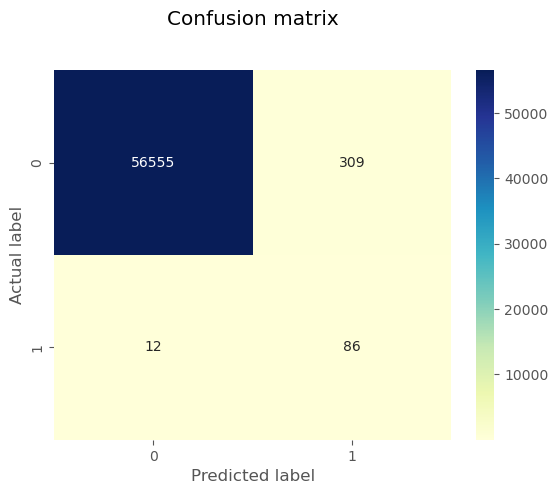

Accuracy: 0.9943646641620729
Precision: 0.21772151898734177
Recall: 0.8775510204081632
F1 score: 0.3488843813387424


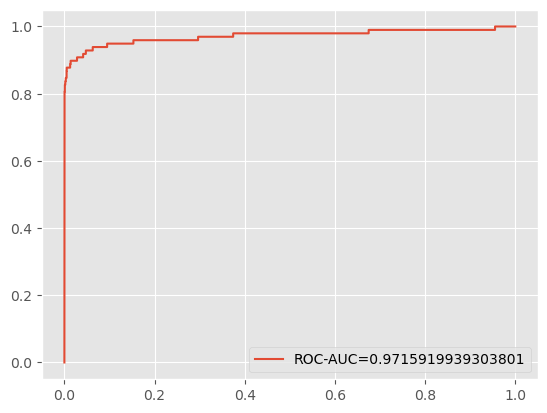

In [78]:
print(f"The training dataset has {sorted(Counter(y_train_smote).items())[0][1]} records for the majority class and {sorted(Counter(y_train_smote).items())[1][1]} records for the minority class.")
lr = LogisticRegression(C=0.01, penalty='l2')
lr.fit(X_train_smote, y_train_smote)

print("Training scores:")
model_scores(y_train_smote, lr.predict(X_train_smote))

y_pred_lr = lr.predict(X_valid_processed)
visualize_confusion_matrix(confusion_matrix(y_valid, y_pred_lr))
model_scores(y_valid, y_pred_lr)
plot_roc_curve(lr, y_valid, X_valid_processed)

## Cross validation

In [63]:
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('scale_data', StandardScaler(), ['Amount', 'Time'])])

In [22]:
def model_cv(X_train, y_train, pipeline, score, param_grid):
    skf = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               scoring=score,
                               cv=skf,
                               n_jobs=-1)
    
    
    grid_search.fit(X_train, y_train)
    cv_score = grid_search.best_score_

    print('ROC-AUC score - training:',cv_score)
    print('Best hyperparameters: ', grid_search.best_params_)

    return grid_search

### Logistic Rgeression

1.1 Without SMOTE

In [75]:
param_grid = dict(classifier__C = [0.01, 0.1, 1, 10], classifier__penalty = ['l1', 'l2'])

ROC-AUC score - training: 0.9810704000379584
Best hyperparameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l2'}


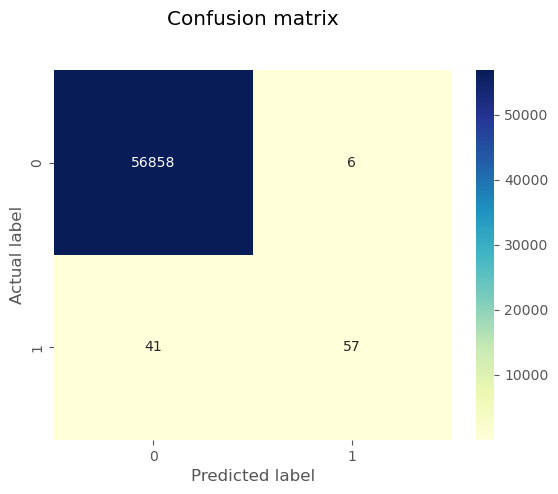

Accuracy: 0.9991748885221726
Precision: 0.9047619047619048
Recall: 0.5816326530612245
F1 score: 0.7080745341614907


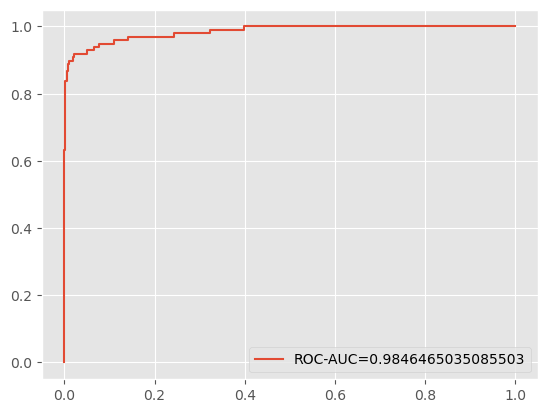

In [76]:
pipeline = Pipeline(steps = [['pre_process',pre_process],
                             ['classifier', LogisticRegression()]])
    
gs = model_cv(X_train, y_train, pipeline, 'roc_auc', param_grid)

y_pred = gs.predict(X_valid)
visualize_confusion_matrix(confusion_matrix(y_valid, y_pred))
model_scores(y_valid, y_pred)
plot_roc_curve(gs, y_valid, X_valid)

1.2 With SMOTE

ROC-AUC score - training: 0.9754213017736623
Best hyperparameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l2'}


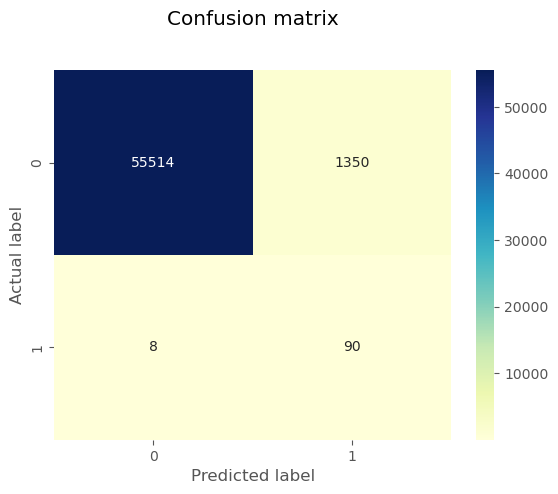

Accuracy: 0.9761595449597977
Precision: 0.0625
Recall: 0.9183673469387755
F1 score: 0.11703511053315994


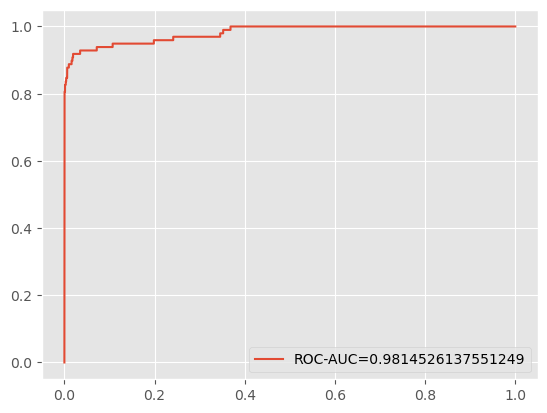

In [77]:
pipeline = Pipeline(steps = [['pre_process', pre_process],
                             ['smote', SMOTE()],
                             ['classifier', LogisticRegression()]])
    

gs = model_cv(X_train, y_train, pipeline, "roc_auc", param_grid)

y_pred = gs.predict(X_valid)

visualize_confusion_matrix(confusion_matrix(y_valid, y_pred))
model_scores(y_valid, y_pred)
plot_roc_curve(gs, y_valid, X_valid)

### Random Forest

1.1 Without SMOTE

In [69]:
# Parameters and values to tune
param_grid = dict(classifier__n_estimators = [50])
 

ROC-AUC score - training: 0.9418844282997574
Best hyperparameters:  {'classifier__n_estimators': 50}


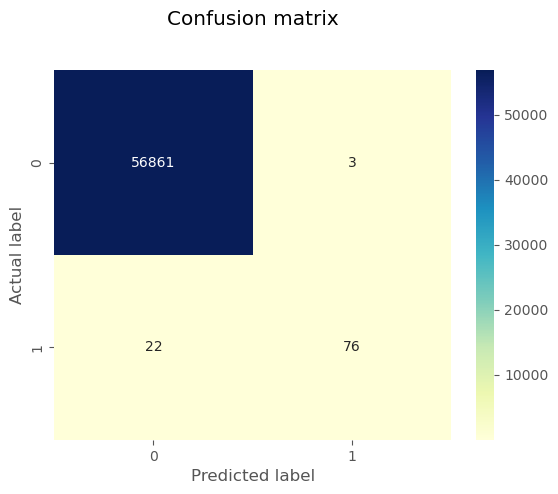

Accuracy: 0.9995611109160493
Precision: 0.9620253164556962
Recall: 0.7755102040816326
F1 score: 0.8587570621468926


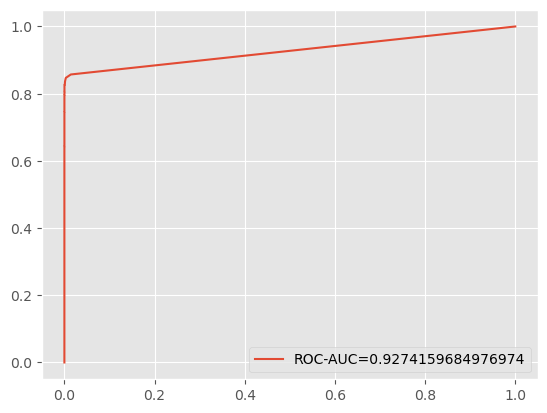

In [70]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps = [['pre_process', pre_process],
                             ['classifier', RandomForestClassifier()]])
    

gs = model_cv(X_train, y_train, pipeline, 'roc_auc', param_grid)

y_pred = gs.predict(X_valid)

visualize_confusion_matrix(confusion_matrix(y_valid, y_pred))
model_scores(y_valid, y_pred)
plot_roc_curve(gs, y_valid, X_valid)

1.2 With SMOTE

ROC-AUC score - training: 0.9607964214702738
Best hyperparameters:  {'classifier__n_estimators': 50}


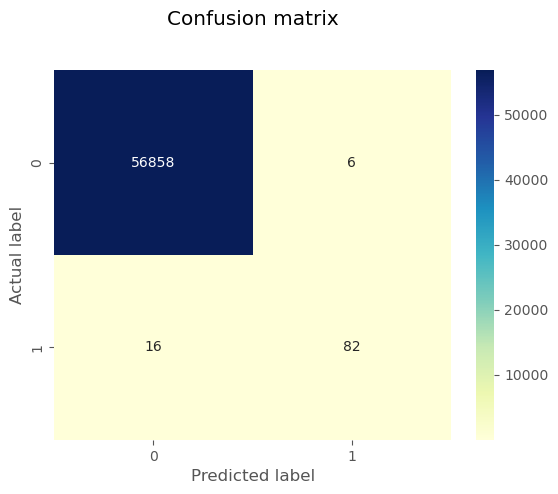

Accuracy: 0.9996137776061234
Precision: 0.9318181818181818
Recall: 0.8367346938775511
F1 score: 0.8817204301075268


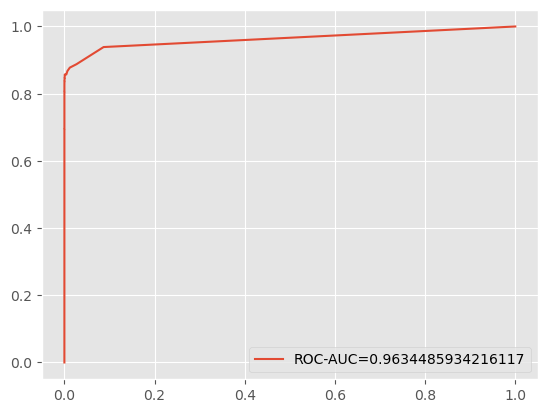

In [71]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps = [['pre_process', pre_process],
                             ['smote', SMOTE()],
                             ['classifier', RandomForestClassifier()]])
    

gs = model_cv(X_train, y_train, pipeline, 'roc_auc', param_grid)

y_pred = gs.predict(X_valid)

visualize_confusion_matrix(confusion_matrix(y_valid, y_pred))
model_scores(y_valid, y_pred)
plot_roc_curve(gs, y_valid, X_valid)